# ExxonMobil Corporation(XOM) Stock Price Analysis and Prediction

### Introduction

Exxon Mobil Corporation, is an American multinational oil and gas corporation headquartered in Irving, Texas.

The company explores for and produces crude oil and natural gas in the United States, Canada/South America, Europe, Africa, Asia, and Australia/Oceania. It also manufactures and markets commodity petrochemicals, including olefins, aromatics, polyethylene and polypropylene plastics, and specialty products; and transports and sells crude oil, natural gas, and petroleum products. Exxon Mobil Corporation was formerly known as Exxon Corporation and changed its name to Exxon Mobil Corporation in November, 1999.

A trend of bearish technical signs has been illustrated by Exxon Mobil Corp. (XOM). We are careful as global oil prices continue to fall and production is still at a very high historical level. 

In the second quarter, Exxon Mobil Corp.'s profit dropped by half on sharply lower oil and gas prices around the world, but the company's oil and gas production, which has typically declined in recent years, increased.

In this project, we analyze the ExxonMobil’s stock price with respect to its competitors and predict the Exxon’s stock
price.

### Data Dictionary

The data is obtained from Yahoo finance. The dataset consists of stock market data of XOM from Nov 30, 2010 to Nov 30, 2020.

| Attribute Name | Description |
|:----------------|:-------------|
|Date |Date in yyyy-mm-dd|
|High | Highest price at which a stock traded during a period|
|Low | lowest price at which a stock traded during a period|
|Close | Price of an individual stock before the stock closes for the day|
|Volume | total number of shares traded in a security over a period|
|Adj Close | Adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions|

In [1]:
#Install the dependencies
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import os

from pandas_datareader import data, wb
from pandas.util.testing import assert_frame_equal
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping

import plotly
import chart_studio
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

from fbprophet import Prophet

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import pmdarima
from pmdarima.arima import auto_arima

<ipython-input-1-949f2828b371>:11: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start = datetime.datetime(2010,11,30)
end = datetime.datetime(2020,11,30)
ticker = "XOM"
data =data.DataReader(ticker,'yahoo',start,end)
data

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2010-11-30  69.750000  68.320000  68.550003  69.559998  27524300.0  47.884735
2010-12-01  71.550003  70.379997  70.379997  71.330002  26590200.0  49.103195
2010-12-02  71.660004  70.949997  71.190002  71.480003  21274800.0  49.206451
2010-12-03  71.300003  70.889999  71.010002  71.190002  19457100.0  49.006813
2010-12-06  71.599998  71.059998  71.199997  71.309998  15985400.0  49.089413
...               ...        ...        ...        ...         ...        ...
2020-11-23  39.430000  37.279999  37.500000  39.360001  29367600.0  39.360001
2020-11-24  42.080002  40.220001  40.509998  41.980000  46979300.0  41.980000
2020-11-25  41.709999  40.650002  41.669998  40.810001  28178200.0  40.810001
2020-11-27  40.939999  39.869999  40.700001  40.189999  14971900.0  40.189999
2020-11-30  39.880001  37.970001  39.799999  38.130001  45614300.0  38.130001

[2518 rows x 6 columns]

### Exploratory Data Analysis

We reset the index to get the Date as a new column, then we check the for null values and data types of our attributes.

In [3]:
df = data
df.reset_index(inplace = True)
df

Date       High        Low       Open      Close      Volume  \
0    2010-11-30  69.750000  68.320000  68.550003  69.559998  27524300.0   
1    2010-12-01  71.550003  70.379997  70.379997  71.330002  26590200.0   
2    2010-12-02  71.660004  70.949997  71.190002  71.480003  21274800.0   
3    2010-12-03  71.300003  70.889999  71.010002  71.190002  19457100.0   
4    2010-12-06  71.599998  71.059998  71.199997  71.309998  15985400.0   
...         ...        ...        ...        ...        ...         ...   
2513 2020-11-23  39.430000  37.279999  37.500000  39.360001  29367600.0   
2514 2020-11-24  42.080002  40.220001  40.509998  41.980000  46979300.0   
2515 2020-11-25  41.709999  40.650002  41.669998  40.810001  28178200.0   
2516 2020-11-27  40.939999  39.869999  40.700001  40.189999  14971900.0   
2517 2020-11-30  39.880001  37.970001  39.799999  38.130001  45614300.0   

      Adj Close  
0     47.884735  
1     49.103195  
2     49.206451  
3     49.006813  
4     49.089413  
...         ...  
2513  39.360001  
2514  41.980000  
2515  40.810001  
2516  40.189999  
2517  38.130001  

[2518 rows x 7 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2518 non-null   datetime64[ns]
 1   High       2518 non-null   float64       
 2   Low        2518 non-null   float64       
 3   Open       2518 non-null   float64       
 4   Close      2518 non-null   float64       
 5   Volume     2518 non-null   float64       
 6   Adj Close  2518 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 137.8 KB


In [5]:
#Plotting Open, Close, High, Low to see how they vary over the given time period
trace_open = go.Scatter(
    x = df["Date"],
    y = df["Open"],
    mode = 'lines',
    name="Open"
)

trace_high = go.Scatter(
    x = df["Date"],
    y = df["High"],
    mode = 'lines',
    name="High"
)

trace_low = go.Scatter(
    x = df["Date"],
    y = df["Low"],
    mode = 'lines',
    name="Low"
)

trace_close = go.Scatter(
    x = df["Date"],
    y = df["Close"],
    mode = 'lines',
    name="Close"
)



data = [trace_open,trace_high,trace_low,trace_close]

layout = go.Layout(title="XOM Stock Price",xaxis_rangeslider_visible=True)

fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig)

In [6]:
#Plotting Volume over the given time period
trace_volume = go.Scatter(
    x = df["Date"],
    y = df["Volume"],
    mode = 'lines',
    name="Volume"
)

data_volume = [trace_volume]

layout_volume = go.Layout(title="Volume",xaxis_rangeslider_visible=True)

fig_volume = go.Figure(data=data_volume,layout=layout_volume)

plotly.offline.iplot(fig_volume)

##### Candlesticks Interpretation
Perhaps the most common graphical way of displaying commodities price behavior in a giving time frame, candlestick graphs allows us to get a quick and intuitive perception on the stock’s performance. Each candle represents a specific period of analysis and informs the opening and closing prices, as well as it’s highs and lows.

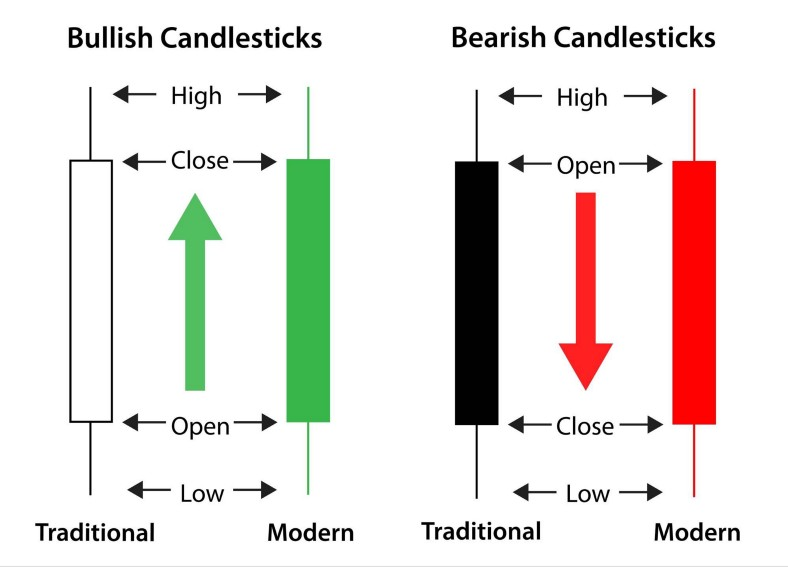

In [7]:
trace = go.Candlestick(x = df['Date'].tolist(),
                       open = df['Open'].values.tolist(),
                       high = df['High'].values.tolist(),
                       low = df['Low'].values.tolist(),
                       close = df['Close'].values.tolist(),
                      increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = go.Layout(title="XOM Historical Price",
                   xaxis_rangeslider_visible=False,
                   yaxis= {'title': 'Stock Price'}
                  )




data = [trace]

fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig)

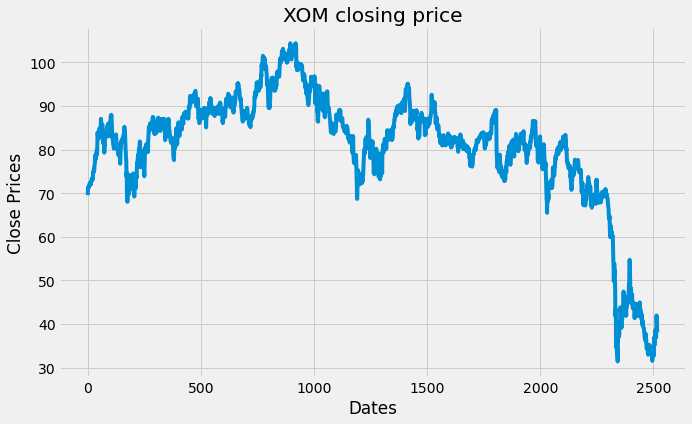

In [8]:
#Plotting close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('XOM closing price')
plt.show()

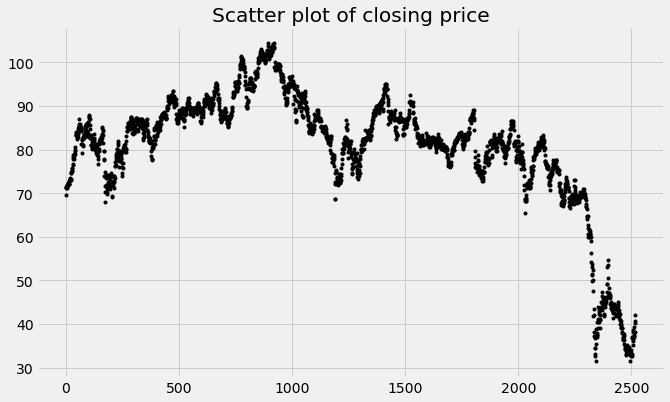

In [9]:
df_close = df['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

- **Level**: The average value in the series.
- **Trend**: The increasing or decreasing value in the series.
- **Seasonality**: The repeating short-term cycle in the series.
- **Noise**: The random variation in the series.
First, we need to check if a series is stationary or not because time series analysis only works with stationary data.

##### ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

**Null Hypothesis**: The series has a unit root (value of a =1)

**Alternate Hypothesis**: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

So let's check for stationarity:

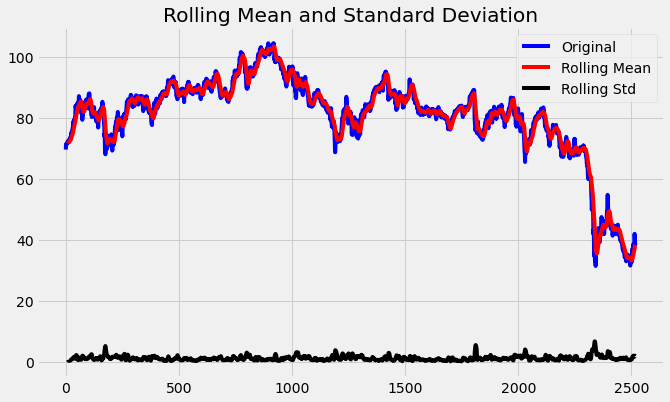

Results of dickey fuller test
Test Statistics                  -0.499313
p-value                           0.892151
No. of lags used                  3.000000
Number of observations used    2514.000000
critical value (1%)              -3.432954
critical value (5%)              -2.862690
critical value (10%)             -2.567382
dtype: float64


In [10]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

Through the above graph, we can see the increasing mean and standard deviation and hence our series is not stationary.

We see that the **p-value is greater than 0.05 so we cannot reject the Null hypothesis**. Also, the test statistics is greater than the critical values.Hence, the data is **non-stationary**.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

So let us separate Trend and Seasonality from the time series.

<Figure size 720x432 with 0 Axes>

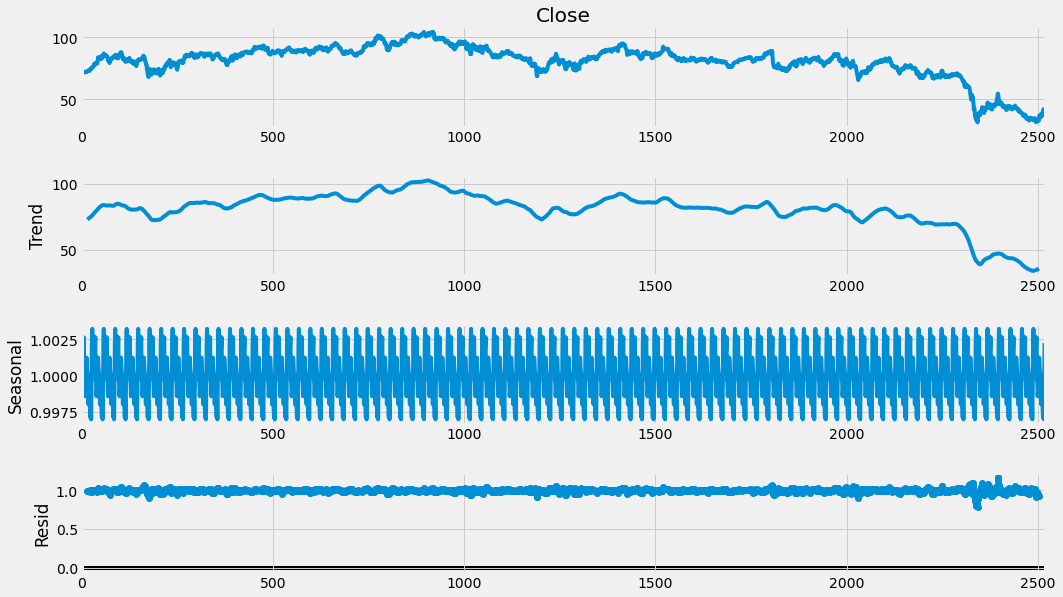

In [11]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

We start by **taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series**. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

No handles with labels found to put in legend.


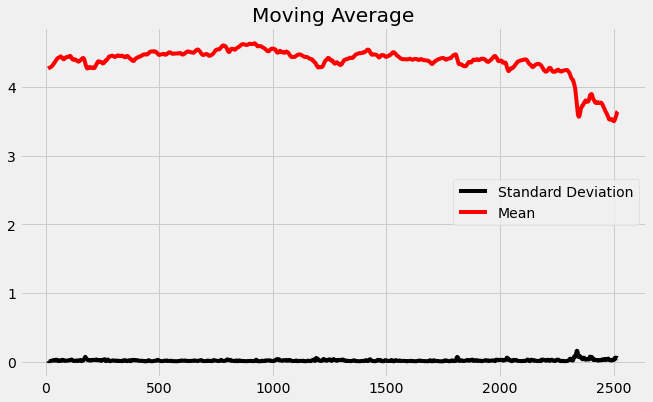

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

### Linear Regression

We are creating a variable called forecast_out, to store the number of days (30 days) into the future that we want to predict. This variable will be used through out the program so that we can simply change the number and the rest of the program will correspond accordingly.

**Pros**:
- Simple to implement.
- Used to predict numeric values.

**Cons**:
- Prone to overfitting.
- Cannot be used when the relation between independent and dependent variable are non linear.

In [13]:
df1 = df[['Close']]

We also need a column (the target or dependent variable) that will hold the predicted price values 30 days into the future. The future price that we want that’s 30 days into the future is just 30 rows down from the current Close price. So we will create a new column called ‘Prediction’ and populate it with data from the Close column but shifted 30 rows up to get the price.

In [14]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target ) shifted 'n' units up
df1['Prediction'] = df1[['Close']].shift(-forecast_out)
#print the new data set
print(df1.tail())

          Close  Prediction
2513  39.360001         NaN
2514  41.980000         NaN
2515  40.810001         NaN
2516  40.189999         NaN
2517  38.130001         NaN


In [15]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df1.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[69.55999756]
 [71.33000183]
 [71.48000336]
 ...
 [34.15000153]
 [34.45000076]
 [34.09999847]]


In [16]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df1['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[76.58000183 76.70999908 77.83999634 ... 40.81000137 40.18999863
 38.13000107]


In [17]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [18]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.8437451001315613


In [20]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df1.drop(['Prediction'],1))[-forecast_out:]

In [21]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[33.42741569 33.7050108  33.16965286 34.85503686 34.16105477 33.35801786
 32.83257606 31.59332367 32.98128786 32.63429492 33.99251826 33.41750334
 33.23905069 33.17956521 32.79291908 36.90723851 36.83784068 36.46110689
 35.22185451 36.0645484  38.1266624  38.63227571 37.18482983 37.37319862
 36.91715086 39.31634545 41.91381739 40.75387897 40.13920707 38.09692155]


In [22]:
x_forecast_dict = dict(enumerate(x_forecast.flatten(), 1))
lr_pred_dict = dict(enumerate(lr_prediction.flatten(), 1))

In [23]:
forecast = pd.DataFrame()
forecast['x_forecast'] = x_forecast_dict.values()
forecast['lr_prediction'] = lr_pred_dict.values()

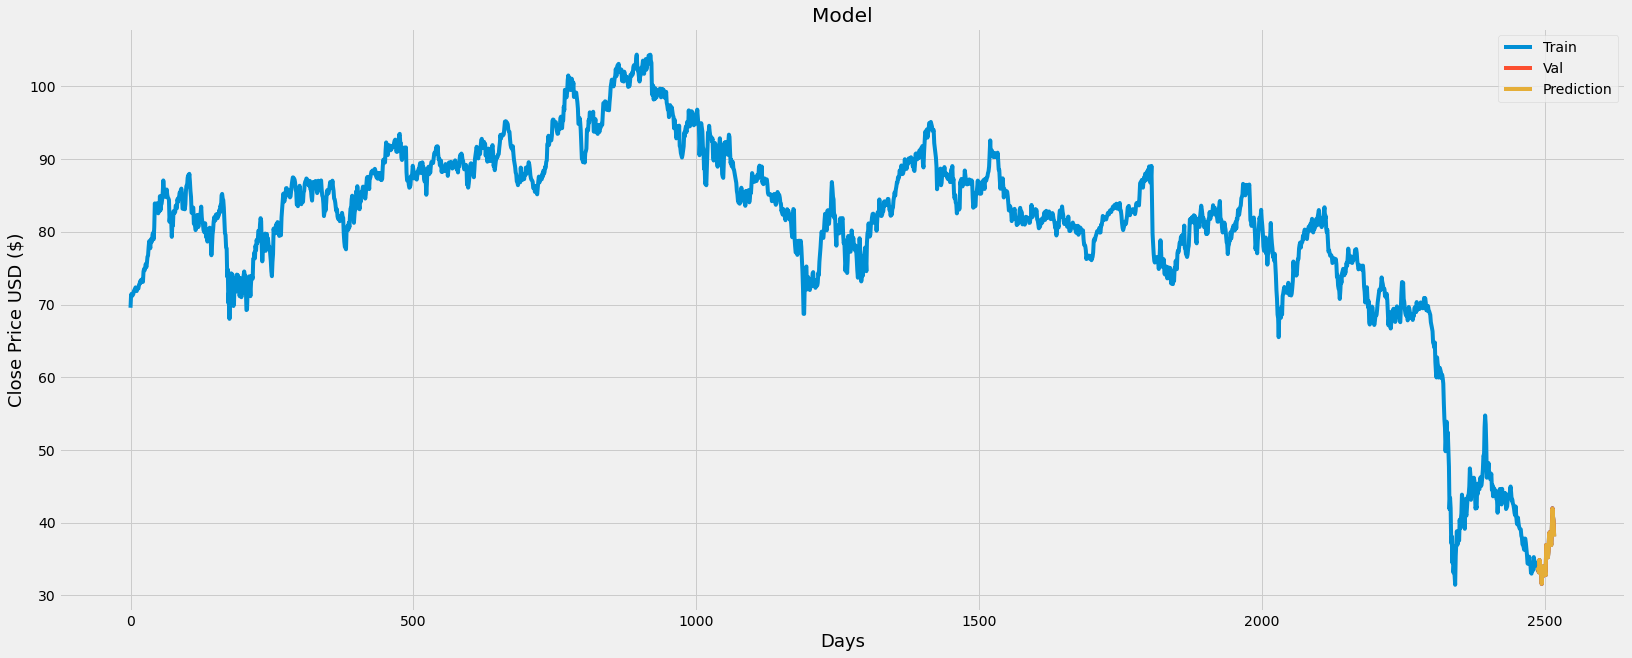

In [24]:
#Visualize the data
predictions = lr_prediction
#Plot the data
valid =  df1[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(25,10))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(df1['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='upper right')
plt.show()

In [25]:
trace_open = go.Scatter(
    x = df.iloc[-30:, 0],
    y = forecast['x_forecast'],
    mode = 'lines',
    name="True",
)

trace_high = go.Scatter(
    x = df.iloc[-30:, 0],
    y = forecast['lr_prediction'],
    mode = 'lines',
    name="Predicted"
)




data = [trace_open,trace_high]

layout = go.Layout(title="Linear Regression Model",xaxis_rangeslider_visible=True)

fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig)

### Support Vector Regression
Support Vector Regression (SVR) is a type of Support Vector Machine, and is a type of supervised learning algorithm that analyzes data for regression analysis.

 **Pros**:
- It is effective in high dimensional spaces.
- It works well with clear margin of separation.
- It is effective in cases where number of dimensions is greater than the number of samples.

**Cons**:
- It does not perform well, when we have large data set.
- Low performance if the data set is noisy ( a large amount of additional meaningless information).

In [26]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [27]:
# Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [28]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.8967532120393997


In [29]:
# Print support vector regressor model predictions for the next '30' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[37.68436534 37.80863063 37.69406249 37.9233922  38.05423136 37.67133167
 38.03010536 43.99022693 37.82731316 38.45709056 37.9766576  37.68192024
 37.6745183  37.69038761 38.10055365 35.0435159  35.12862973 35.62261922
 37.52567739 36.21265212 33.81143002 33.74407013 34.71613478 34.50396141
 35.03147982 34.71734018 42.08571103 39.93531009 37.55265508 33.82953053]


In [30]:
svm_pred_dict = dict(enumerate(svm_prediction.flatten(), 1))

In [31]:
forecast['svm_prediction'] = svm_pred_dict.values()

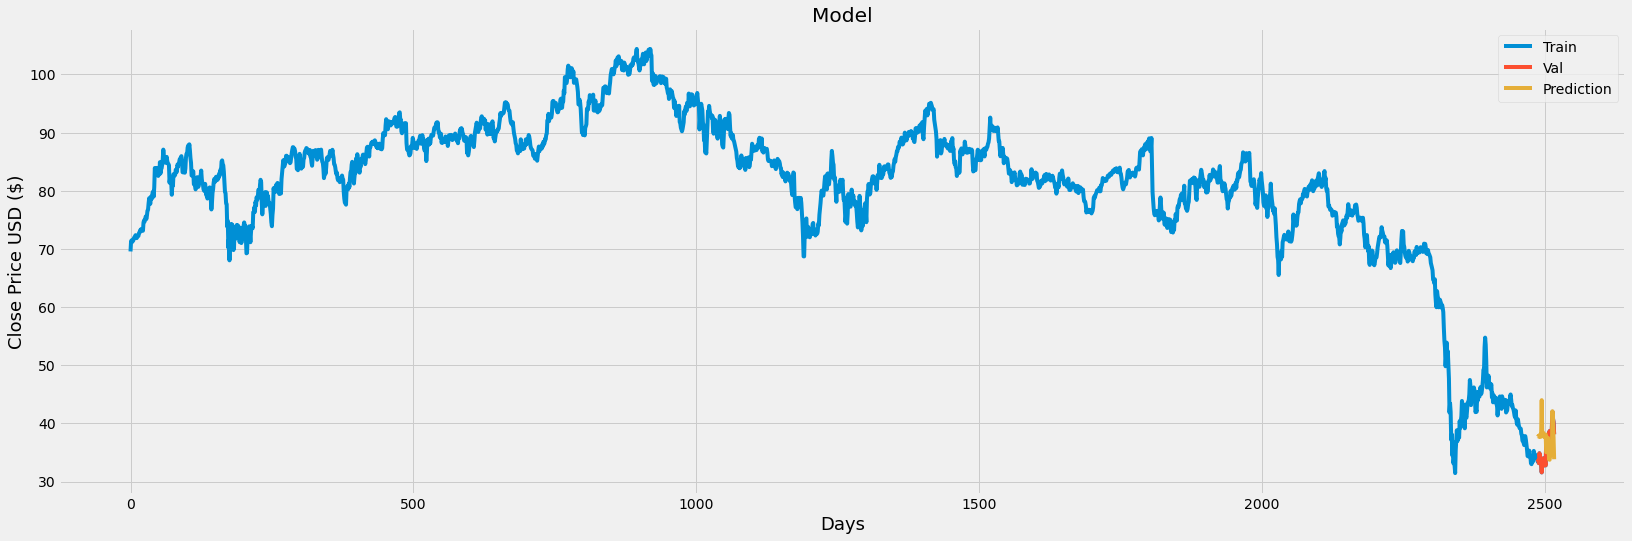

In [32]:
#Visualize the data
predictions = svm_prediction
#Plot the data
valid =  df1[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(25,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(df1['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='upper right')
plt.show()

In [33]:
trace_open = go.Scatter(
    x = df.iloc[-30:, 0],
    y = forecast['x_forecast'],
    mode = 'lines',
    name="True",
)

trace_high = go.Scatter(
    x = df.iloc[-30:, 0],
    y = forecast['svm_prediction'],
    mode = 'lines',
    name="Predicted"
)




data = [trace_open,trace_high]

layout = go.Layout(title="SVM Model",xaxis_rangeslider_visible=True)

fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig)

### ARIMA

We are going to create an ARIMA model and will train it with the closing price of the stock on the train data. So let us split the data into training and test set and visualize it.

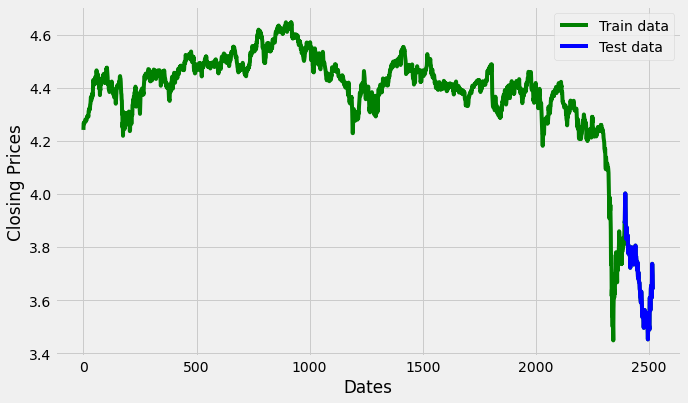

In [34]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.95)], df_log[int(len(df_log)*0.95):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: **seasonality, trend, and noise.** These parameters are labeled p,d,and q.

**Auto ARIMA**: Automatically discover the optimal order for an ARIMA model.

The auto_arima function seeks to identify the most optimal parameters for an ARIMA model, and returns a fitted ARIMA model. This function is based on the commonly-used R function, forecast::auto.arima.

The auro_arima function works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. 
If the seasonal optional is enabled, auto_arima also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

In [35]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13507.192, Time=0.73 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13516.492, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13515.270, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-13508.850, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-13522.919, Time=1.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-13522.119, Time=3.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-13522.264, Time=1.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-13520.357, Time=3.72 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-13520.076, Time=0.94 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-13524.572, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-13518.097, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-13523.754, Time=0.74 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-13523.912, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-13521.924, Time=0.30 sec
 ARIM

So the Auto ARIMA model provided the value of **p,d, and q as 2,1 and 0** respectively.

Before moving forward, let’s review the residual plots from auto ARIMA.

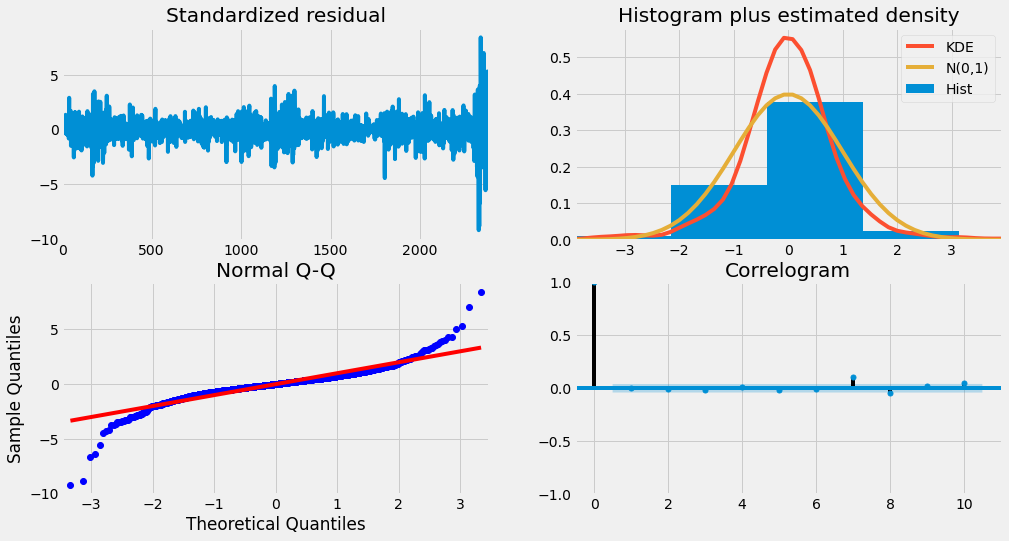

In [36]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

**Top left:** The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

**Top Right:** The density plot suggest normal distribution with mean zero.

**Bottom left:** All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

**Bottom Right:** The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to be a good fit. Let’s start forecasting the stock prices.

Next, create an ARIMA model with provided optimal parameters p, d and q.

In [37]:
model = ARIMA(train_data, order=(2, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2388
Model:                 ARIMA(2, 1, 0)   Log Likelihood                6765.460
Method:                       css-mle   S.D. of innovations              0.014
Date:                Wed, 16 Dec 2020   AIC                         -13522.919
Time:                        02:55:22   BIC                         -13499.806
Sample:                             1   HQIC                        -13514.509
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0002      0.000     -0.589      0.556      -0.001       0.000
ar.L1.D.Close    -0.0646      0.020     -3.161      0.002      -0.105      -0.025
ar.L2.D.Close     0.0594      0.020     

Now let's start forecast the stock prices on the test dataset keeping 95% confidence level.

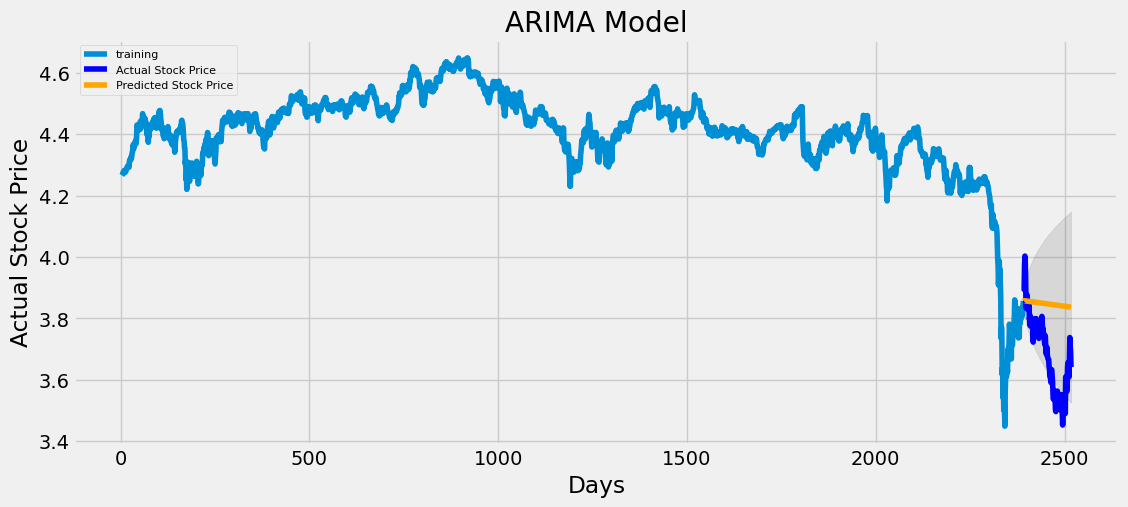

In [38]:
# Forecast
fc, se, conf = fitted.forecast(126, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('ARIMA Model')
plt.xlabel('Days')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [39]:
ar = pd.DataFrame()

In [40]:
ar['fc_series']= fc_series
ar['lower_series'] = lower_series
ar['upper_series'] = upper_series
ar['actual'] = test_data
ar['date'] = df.iloc[-252:, 0]
ar

fc_series  lower_series  upper_series    actual       date
2392   3.856177      3.828276      3.884077  3.896706 2020-06-03
2393   3.857347      3.819144      3.895551  3.893859 2020-06-04
2394   3.857068      3.809778      3.904357  3.971800 2020-06-05
2395   3.856984      3.802204      3.911763  4.002595 2020-06-08
2396   3.856801      3.795385      3.918217  3.980055 2020-06-09
...         ...           ...           ...       ...        ...
2513   3.836838      3.530402      4.143274  3.672750 2020-11-23
2514   3.836667      3.528977      4.144357  3.737193 2020-11-24
2515   3.836497      3.527557      4.145436  3.708927 2020-11-25
2516   3.836326      3.526142      4.146510  3.693618 2020-11-27
2517   3.836155      3.524732      4.147578  3.641001 2020-11-30

[126 rows x 5 columns]

In [41]:
trace_open = go.Scatter(
    x = ar['date'],
    y = ar['fc_series'],
    mode = 'lines',
    name="Forecast"
)

trace_high = go.Scatter(
    x = ar['date'],
    y = ar['upper_series'],
    mode = 'lines',
    fill = "tonexty", 
    line = {"color": "#57b8ff"}, 
    name="Higher uncertainty interval"
)

trace_low = go.Scatter(
    x = ar['date'],
    y = ar['lower_series'],
    mode = 'lines',
    fill = "tonexty", 
    line = {"color": "#57b8ff"}, 
    name="Lower uncertainty interval"
)

trace_close = go.Scatter(
    x = ar['date'],
    y = ar['actual'],
    name="Data values"
)



data = [trace_open,trace_high,trace_low,trace_close]

layout = go.Layout(title="ARIMA Model",xaxis_rangeslider_visible=True)

fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig)

Let us check the commonly used accuracy metrics to judge forecast results:

In [42]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.04192005827108994
MAE: 0.17312737616677829
RMSE: 0.20474388457555928
MAPE: 0.04804420167389875


### Prophet

Prophet is a forecasting model which allows to deal with multiple seasonalities. It is an open source software released by Facebook’s Core Data Science team.

In [43]:
df_fc = df[777:2517] # 2014-01-02 date
df_fc.head()

Date        High         Low        Open       Close      Volume  \
777 2014-01-02  100.760002   99.389999  100.599998   99.750000  11028100.0   
778 2014-01-03  100.169998   99.139999   99.769997   99.510002   9295600.0   
779 2014-01-06  100.139999   98.889999   99.940002   99.660004  11848500.0   
780 2014-01-07  101.220001   99.419998   99.610001  101.070000  11187000.0   
781 2014-01-08  101.190002  100.150002  101.190002  100.739998  11180400.0   

     Adj Close  
777  74.045746  
778  73.867615  
779  73.978935  
780  75.025612  
781  74.780640

In [44]:
model = Prophet()


df_prophet = df_fc.drop(['Open', 'High', 'Low','Volume', 'Adj Close'], axis=1)
df_prophet.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

df_prophet.head(10)

ds           y
777 2014-01-02   99.750000
778 2014-01-03   99.510002
779 2014-01-06   99.660004
780 2014-01-07  101.070000
781 2014-01-08  100.739998
782 2014-01-09   99.760002
783 2014-01-10  100.519997
784 2014-01-13   98.550003
785 2014-01-14   99.120003
786 2014-01-15   98.779999

In [45]:
model.fit(df_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
future_prices = model.make_future_dataframe(periods=365)
forecast = model.predict(future_prices)
df_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
df_forecast.head()

ds       yhat  yhat_lower  yhat_upper
0 2014-01-02  98.631202   94.073633  103.528339
1 2014-01-03  98.651046   94.100645  103.168786
2 2014-01-06  98.847121   94.330956  103.464994
3 2014-01-07  99.061925   94.394564  103.592690
4 2014-01-08  98.978871   94.639033  103.507302

In [47]:
trace_open = go.Scatter(
    x = df_forecast["ds"],
    y = df_forecast["yhat"],
    mode = 'lines',
    name="Forecast"
)

trace_high = go.Scatter(
    x = df_forecast["ds"],
    y = df_forecast["yhat_upper"],
    mode = 'lines',
    fill = "tonexty", 
    line = {"color": "#57b8ff"}, 
    name="Higher uncertainty interval"
)

trace_low = go.Scatter(
    x = df_forecast["ds"],
    y = df_forecast["yhat_lower"],
    mode = 'lines',
    fill = "tonexty", 
    line = {"color": "#57b8ff"}, 
    name="Lower uncertainty interval"
)

trace_close = go.Scatter(
    x = df_prophet["ds"],
    y = df_prophet["y"],
    name="Data values"
)



data = [trace_open,trace_high,trace_low,trace_close]

layout = go.Layout(title="Prophet Model",xaxis_rangeslider_visible=True)

fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig)

### Long-Short Term Memory (LSTM)

Unlike regression predictive modeling, time series also adds the complexity of a sequence dependence among the input variables.

A powerful type of neural network designed to handle sequence dependence is called **recurrent neural networks**. The Long Short-Term Memory network or LSTM network is a type of recurrent neural network used in deep learning because very large architectures can be successfully trained.

In [48]:
training_set = df.iloc[:1000, 1:2].values
test_set = df.iloc[1000:, 1:2].values

In [49]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 1000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

We will build the LSTM with **50 neurons and 4 hidden layers**. Finally, we will assign 1 neuron in the output layer for predicting the normalized stock price. We will use the **MSE loss function and the Adam stochastic gradient descent optimizer**.

In [50]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 4s 134ms/step - loss: 0.0580
Epoch 2/100
30/30 [==============================] - 4s 138ms/step - loss: 0.0114
Epoch 3/100
30/30 [==============================] - 4s 128ms/step - loss: 0.0095
Epoch 4/100
30/30 [==============================] - 4s 125ms/step - loss: 0.0100
Epoch 5/100
30/30 [==============================] - 5s 160ms/step - loss: 0.0098
Epoch 6/100
30/30 [==============================] - 4s 145ms/step - loss: 0.0081
Epoch 7/100
30/30 [==============================] - 4s 135ms/step - loss: 0.0082
Epoch 8/100
30/30 [==============================] - 4s 124ms/step - loss: 0.0080
Epoch 9/100
30/30 [==============================] - 4s 147ms/step - loss: 0.0075
Epoch 10/100
30/30 [==============================] - 4s 127ms/step - loss: 0.0082
Epoch 11/100
30/30 [==============================] - 4s 125ms/step - loss: 0.0073
Epoch 12/100
30/30 [==============================] - 4s 140ms/step - loss: 0.0068
Epoch 13/100


In [51]:
# Getting the predicted stock price of 2020
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1778):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(1718, 60, 1)


In [52]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [53]:
print(predicted_stock_price)

[[90.96582 ]
 [90.40686 ]
 [90.22614 ]
 ...
 [47.96023 ]
 [48.445175]
 [48.950718]]


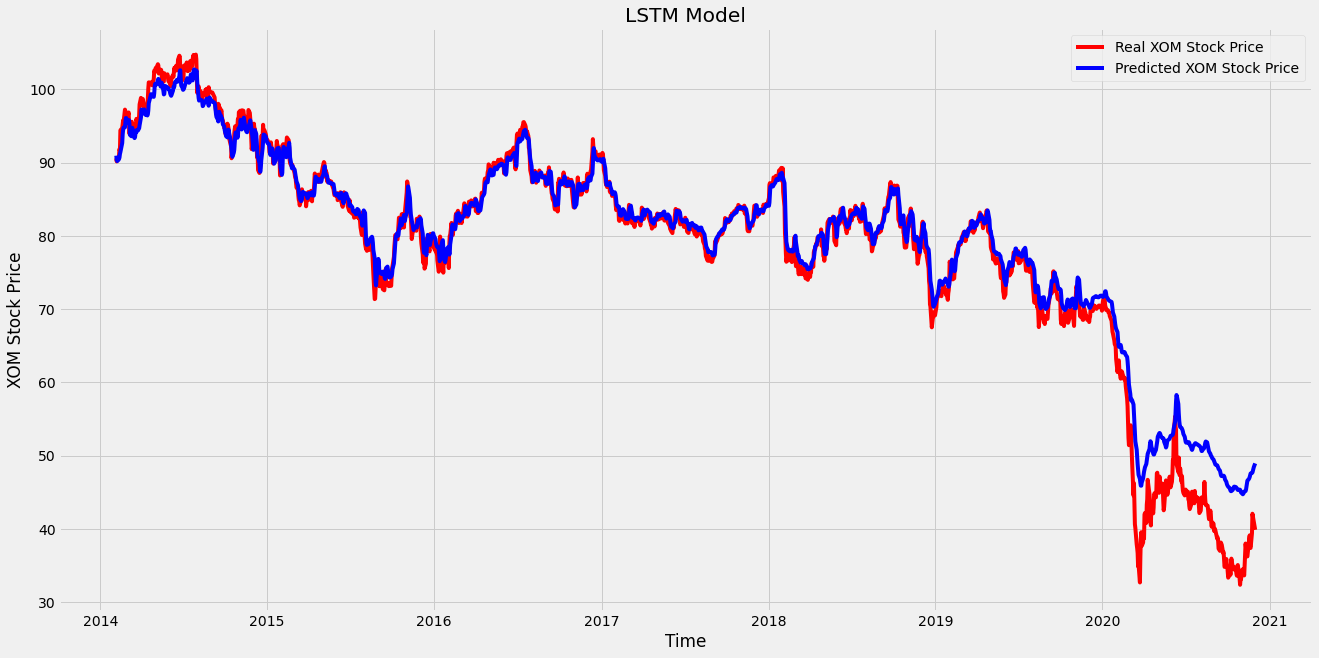

In [54]:
# Visualising the results
plt.figure(figsize=(20, 10))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real XOM Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted XOM Stock Price')
#plt.xticks(np.arange(0,1778,50))
plt.title('LSTM Model')
plt.xlabel('Time')
plt.ylabel('XOM Stock Price')
plt.legend()
plt.show()

In [55]:
df2 = df
df2.loc[800:, 'Predicted'] = predicted_stock_price
df2.loc[800:, 'Closing'] = dataset_test.values

In [56]:
df2 = df2.drop(columns=['Open', 'High', 'Low', 'Close','Adj Close','Volume'], axis = 1)

In [57]:
df2.dropna()

Date  Predicted    Closing
800  2014-02-05  90.965820  90.610001
801  2014-02-06  90.406860  90.180000
802  2014-02-07  90.226143  90.629997
803  2014-02-10  90.395180  90.529999
804  2014-02-11  90.519081  91.000000
...         ...        ...        ...
2513 2020-11-23  47.651627  39.430000
2514 2020-11-24  47.698895  42.080002
2515 2020-11-25  47.960232  41.709999
2516 2020-11-27  48.445175  40.939999
2517 2020-11-30  48.950718  39.880001

[1718 rows x 3 columns]

In [58]:
forecast = go.Scatter(
    x = df2.loc[800:, 'Date'],
    y = df2.loc[800:, 'Predicted'],
    mode = 'lines',
    name="Forecast"
)

trace_close = go.Scatter(
    x = df2.loc[800:, 'Date'],
    y = df2.loc[800:, 'Closing'],
    mode = 'lines',
    name="Data values"
)

data = [forecast,trace_close]

layout = go.Layout(title="LSTM Model",xaxis_rangeslider_visible=True)

fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig)

Huge drop in March 2020 due to the COVID-19 lockdown !
We can clearly see that our model performed very good. It is able to accuretly follow most of the unexcepted jumps/drops however, for the most recent date stamps, we can see that the model expected (predicted) higher values compared to the real values of the stock price.

### Exxonmobil Business Analysis

##### Competitors:
Let us analyze ExxonMobil's competitiors. Some of the major competitors are: **Chevron Corporation(CVX), Valero Energy(VLO), BP(BP).**

In [59]:
from pandas_datareader import data, wb
start = datetime.datetime(2010,11,30)
end = datetime.datetime(2020,11,30)
ticker = "XOM"
xom =data.DataReader(ticker,'yahoo',start,end)

In [60]:
start = datetime.datetime(2010,11,30)
end = datetime.datetime(2020,11,30)
ticker = "CVX"
cvx =data.DataReader(ticker,'yahoo',start,end)

In [61]:
start = datetime.datetime(2010,11,30)
end = datetime.datetime(2020,11,30)
ticker = "VLO"
vlo =data.DataReader(ticker,'yahoo',start,end)

In [62]:
start = datetime.datetime(2010,11,30)
end = datetime.datetime(2020,11,30)
ticker = "BP"
bp =data.DataReader(ticker,'yahoo',start,end)

In [63]:
comp = pd.DataFrame()

In [64]:
comp['xom'] = xom['Close']
comp['cvx'] = cvx['Close']
comp['vlo'] = vlo['Close']
comp['bp'] = bp['Close']
comp.reset_index(inplace = True)
comp

Date        xom        cvx        vlo         bp
0    2010-11-30  69.559998  80.970001  17.806215  40.000000
1    2010-12-01  71.330002  82.699997  18.427788  40.619999
2    2010-12-02  71.480003  84.500000  18.948812  41.320000
3    2010-12-03  71.190002  84.889999  19.268738  41.490002
4    2010-12-06  71.309998  84.949997  19.177330  42.810001
...         ...        ...        ...        ...        ...
2513 2020-11-23  39.360001  91.029999  56.090000  20.410000
2514 2020-11-24  41.980000  95.620003  58.490002  21.860001
2515 2020-11-25  40.810001  92.139999  56.430000  21.410000
2516 2020-11-27  40.189999  91.309998  56.619999  21.100000
2517 2020-11-30  38.130001  87.180000  53.770000  19.559999

[2518 rows x 5 columns]

In [65]:
trace_xom = go.Scatter(
    x = comp["Date"],
    y = comp["xom"],
    mode = 'lines',
    name="XOM"
)

trace_cvx = go.Scatter(
    x = comp["Date"],
    y = comp["cvx"],
    mode = 'lines',
    name="CVX"
)

trace_vlo = go.Scatter(
    x = comp["Date"],
    y = comp["vlo"],
    mode = 'lines',
    name="VLO"
)

trace_bp = go.Scatter(
    x = comp["Date"],
    y = comp["bp"],
    mode = 'lines',
    name="BP"
)



data = [trace_xom,trace_cvx,trace_vlo,trace_bp]

layout = go.Layout(title="ExxonMobil's Competitors Stock Price",xaxis_rangeslider_visible=True)

fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig)

##### ExxonMobil's correlation with oil prices
- Some of Exxon's competitors, including Shell and France's Total, have been **pivoting towards electricity**. The rationale of this transition is very simple: carbon-based fuels are being replaced by cleaner substitutes, impacting everything from transport to electricity generation.
- In the early part of 2020, oil prices literally dropped to zero, implying that things are not right in energy space. The fact that oil drillers paid consumers to take their oil for a brief period is terrifying. However, prices are back up to $40 a barrel of oil, indicating that the near-death of oil is greatly exaggerated. As a commodity, oil is subject to supply and demand, with current low prices (driven by COVID-19 demand dislocations) triggering a material stir in the industry.

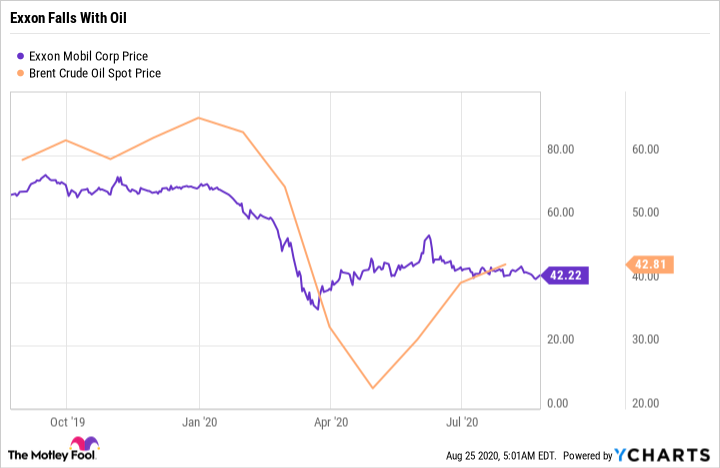

##### Is Exxon going Bankrupt?
An Exxon bankruptcy is extremely unlikely in the near term. As it stands, the organization has one of the strongest balance sheets among its integrated peers. The **debt-to-equity ratio** of Exxon is approximately **0.38 times**. While Chevron (NYSE:CVX) is 0.25 times lower, all European players have a much higher debt-to-equity ratio. At the top of the graph, BP is around 1.1 times. The fact is that 0.38 times is actually a reasonably respectable amount, leaving Exxon with plenty of space on its balance sheet to handle more adversity.

### Conclusion
- One crucial aspect that has led to the longevity of ExxonMobil for more than 100 years is its financial discipline. However with **rising debt levels** recently, investors are worried that ExxonMobil is not keeping up on this front. 
- Consistently low oil and gas prices have had an impact on the company's profits over the last few years, but their massive growth plans have persisted. It  has placed a burden on the balance sheet. 
- In addition, an unprecedented **decline in oil demand** due to the Coronavirus pandemic severely impacted ExxonMobil's success in the second quarter, preventing him from making any debt repayments from earnings.
- **Rising debt levels and mega-capital spending plans** in an unfavorable oil price setting have contributed to a rapid decline in stock prices over the last few years. Its exclusion from the Dow Jones Industrial Average Index further exacerbated investor fears about the oil giant, which at one time was the largest listed firm by market capitalization. ExxonMobil's stock **dropped by more than 40% in 2020**.

It is **not wise** for one to invest in ExxonMobil's stock right now, considering all the above factors.

### Citation
- https://www.kdnuggets.com/2020/01/tutorials.html
- https://medium.com/
- https://plotly.com/python/time-series/
- https://www.fool.com/investing/stock-market/market-sectors/energy/oil-stocks/
- https://www.fool.com/investing-news/

***Project by - Sanjana Sreenivas Athreya***

***RUID - 198000887***